In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [11]:
x = np.linspace(0,1,100)
noise = np.random.normal(loc = 0, scale = 0.25, size=100)
y = np.sin(x * 1.5 * np.pi)
y_noise = y + noise

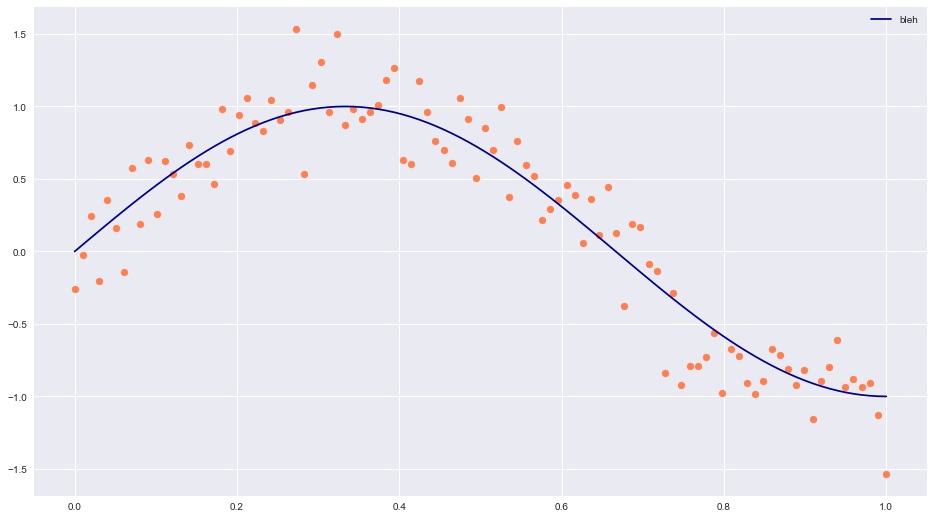

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(x, y, color='darkblue', label='bleh')
plt.scatter(x, y_noise, c=['coral'])
plt.legend()
plt.show()

In [15]:
from scipy import linalg
def lwr(x, y, xtest, tau=0.05):
  ypred = np.zeros(len(xtest)) #initialising

  for i in range(len(xtest)):
    weights = np.array([np.exp(-(x-xtest[i])**2 / (2*tau**2))])
    #weights - 2D array [[100elems]] - outer array has only 1 elem  
    b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
    A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])

    # inverseA = linalg.inv(A) #internally this is what happening
    # theta = inverseA.dot(b)
    theta = linalg.solve(A, b)
    ypred[i] = theta[0] + theta[1] * xtest[i]
  return ypred
xtest = np.linspace(0, 1, 100)
ypred = lwr(x, y, xtest,0.01)
tau=0.2
ypred1 = lwr(x, y, xtest, tau)

tau=1
ypred2 = lwr(x, y, xtest, tau)

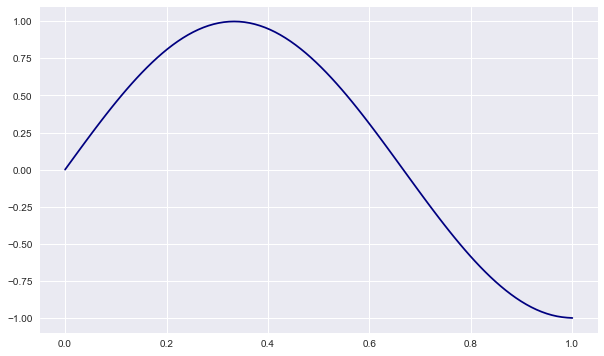

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(xtest, ypred, color='navy')